<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

In [0]:
from tensorflow import keras
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


## **Introducción**

El análisis de sentimientos es un tipo de problema de procesamiento del lenguaje natural que determina el sentimiento o la emoción relacionada con un texto. Por ejemplo, se podría construir un algoritmo para clasificar si la reseña de un producto es positiva, neutral o negativa. El procesamiento del lenguaje natural (NLP - Natural Language Processing) es un campo de la inteligencia artificial que implica que las computadoras entiendan y procesen el lenguaje humano. El objetivo es, a menudo, derivar significado del texto.

Hay muchas aplicaciones diferentes del NLP, entre las cuales se encuentran:

- Traducción de idiomas. 
- Generación de texto y revisión ortográfica / gramatical. 
- etc.

Además, existen numerosas técnicas que se pueden aplicar para analizar texto y extraer significado. Para este mini-proyecto, nos enfocaremos en construir una red neuronal recurrente (RNN) para clasificar el sentimiento de los tweets sobre aerolíneas norteamericanas usando `Keras` y un **Embedding de palabras pre-entrenada**.

##**Ejemplo Many-to-one:** 

Nuestro conjunto de datos se llama "Twitter US Airline Sentiment", el cual se encuentra en archivo csv en el [github del curso](https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/S10/Tweets.csv). Su fuente original era de la biblioteca de datos de Crowdflower para todos. Los tweets fueron tomados de Twitter en febrero de 2015 de cada una de las principales aerolíneas estadounidenses. Luego, los contribuyentes clasificaron cada tweet como "positivo", "neutral" o "negativo" y citaron el motivo de una clasificación negativa, así como un puntaje de confianza para la etiqueta asignada.
El dataset está compuesto por $14,640$ filas y $15$ columnas. Las características incluidas son: 

- Identificación de tweet
- Sentimiento
- Puntaje de confianza de sentimiento
- Razón negativa
- Confianza de razón negativa
- Aerolínea
- "Gold sentiment"
- Nombre
- Recuento de retweet
- Texto de tweet
- Coordenadas de tweet
- Hora del tweet
- Fecha del tweet
- Ubicación del tweet y usuario 
- Zona horaria.

###**Recapitulación**

####**Redes neuronales recurrentes:**

A diferencia de las **FFNN**, que procesan cada entrada de forma individual e independiente, una **RNN** crea bucles entre cada nodo en la red neuronal. Esta característica es especialmente provechosa en el caso de datos secuenciales, como textos. Dicha arquitectura es capaz de procesar secuencias y crear un estado que contiene información sobre lo que la red ha visto hasta cierto momento. Esta es la razón por la cual las RNN son útiles para el procesamiento del lenguaje natural, porque las oraciones se decodifican palabra por palabra, manteniendo en memoria las palabras anteriores para dar un mejor contexto para la comprensión. Una RNN permite que la información de una salida anterior se alimente como entrada al estado actual. En pocas palabras, podemos usar información previa para ayudar a tomar una decisión actual.

####**Long Short-Term Memory (LSTM):**

Las RNN simples sufren el problema del desvanecimiento del gradiente que ocurre cuando la información de las capas anteriores desaparece a medida que la red se vuelve más profunda. Para evitar este problema, se creó el algoritmo LSTM, al permitir que la red neuronal transmitiera información a través de múltiples pasos de tiempo. Esto significa que puede guardar información importante para su uso posterior, evitando que el desvanecimiento del gradiente durante el proceso. Además, una celda LSTM puede determinar qué información eliminar o no. Por lo tanto, puede aprender a reconocer una entrada importante y almacenarla para el futuro mientras elimina información innecesaria.

####**Gradient Recurrent Unit (GRU):**

Para solucionar el desvanecimiento del gradiente, se creó también una capa GRU, que corresponde una versión simplificada de una celda LSTM pero funciona igual de bien.

####**Word Embeddings**

En NPL, los datos textuales deben representarse de manera que un computador pueda trabajar con ellos. Nos enfocaremos en la técnica de *word embeddings*, que es una representación de texto donde **palabras similares tienen una representación similar**. Un modelo de word embedding es **word2vec**, que toma una gran porción de texto y genera un espacio vectorial donde cada palabra única tiene su propio vector correspondiente. En este espacio, las palabras con significados similares se encuentran cerca una de la otra.

Otro modelo popular es el de los **vectores globales para la representación de palabras** (GloVe - Gloval Vectors for word representation), que es una extensión de word2vec. Generalmente permite mejores incorporaciones de palabras al crear una matriz de contexto de palabras. Básicamente, crea una medida para indicar que ciertas palabras tienen más probabilidades de verse en el contexto de otras. Por ejemplo, es probable que la palabra "chip" se vea en el contexto de "potato" pero no con "cloud". Sus desarrolladores crearon las incrustaciones utilizando palabras en inglés obtenidas de Wikipedia y datos de rastreo común.

**Utilizamos un word embedding de palabras pre-entrenado**, ya que se presume que GloVe generaliza los datos con los que trabajaremos. El espacio de embedding creado por GloVe contiene, probablemente, todas las palabras que se encuentran en nuestros tweets, por lo que podemos usar estas representaciones vectoriales en lugar de crear las nuestras a partir de un conjunto de vocabulario mucho más limitado.

#### Ejemplo usando embedding

In [0]:
keras.backend.clear_session()

In [0]:
from tensorflow import keras
import numpy as np

data= """Alégrate de haber reído\n
         Del sabor que habitó en tu gusto\n
         De las palabras candentes\n
         De la siesta dormida en la lluvia\n
         De la mano que te soltó una noche\n 
         De la canción que cantamos un día camino de Sevilla\n
      """

Cuando tenemos un conjunto de palabras, lo primero que queremos hacer es realizar un procesamiento de estos datos, para eso le damos un valor entero que identifique cada palabra de mi texto, de forma tal que podamos convertir la secuencia de palabras en una secuencia de enteros. Buscando tal fin haremos uso de la clase Tokenizer que posee keras para el procesamiento de textos. [info](https://keras.io/preprocessing/text/)

In [0]:
tok=keras.preprocessing.text.Tokenizer()
tok.fit_on_texts([data])

Nosotros podemos ver el resultado del tokenizer para ver como quedó definido nuestro diccionario, o la asiganción a cada palabra, de la siguiente forma:

In [0]:
print(tok.index_word.items())

dict_items([(1, 'de'), (2, 'la'), (3, 'que'), (4, 'en'), (5, 'alégrate'), (6, 'haber'), (7, 'reído'), (8, 'del'), (9, 'sabor'), (10, 'habitó'), (11, 'tu'), (12, 'gusto'), (13, 'las'), (14, 'palabras'), (15, 'candentes'), (16, 'siesta'), (17, 'dormida'), (18, 'lluvia'), (19, 'mano'), (20, 'te'), (21, 'soltó'), (22, 'una'), (23, 'noche'), (24, 'canción'), (25, 'cantamos'), (26, 'un'), (27, 'día'), (28, 'camino'), (29, 'sevilla')])


Ahora pasamos nuestros datos a una secuencia, para eso usamos la herramienta de keras **texts_to_sequence**, es decir pasamos el párrafo en data a una secuencia.

In [0]:
sq_enteros=tok.texts_to_sequences([data])[0]

In [0]:
sq_enteros

[5,
 1,
 6,
 7,
 8,
 9,
 3,
 10,
 4,
 11,
 12,
 1,
 13,
 14,
 15,
 1,
 2,
 16,
 17,
 4,
 2,
 18,
 1,
 2,
 19,
 3,
 20,
 21,
 22,
 23,
 1,
 2,
 24,
 3,
 25,
 26,
 27,
 28,
 1,
 29]

Como acabamos de ver al hacer el fit con el tokenizer se le asocia a cada palabra un entero y luego con **tokenizer.texts_to_sequences** regresamos una secuencia correspondiente a nuestro texto. Un valor que debemos tener en cuenta es el del tamaño de nuestro "diccionario", por esto lo guardamos en la siguiente variable.

In [0]:
con_size = len(tok.word_index) + 1
print(con_size)

30


Ahora, nuestro objetivo será poder predecir la siguiente palabra en la secuencia de acuerdo a la entrada que le demos, por ejemplo, si nuestra entrada es **haber**, nosotros esperaremos que la salida sea **reído**, de acuerdo al texto que tenemos. Para esto vamos a crear una secuencia de a dos palabras de acuerdo a neustros datos (input,output), teniendo en cuenta su orden lo cual nos permitirá entrenar nuestro modelo, para eso hacemos lo siguiente:


In [0]:
secuencia = []

for i in range(1,len(sq_enteros)):
  sequence=sq_enteros[i-1:i+1]
  secuencia.append(sequence)

print('número de datos en la secuencia:',len(secuencia),'\n')
print(secuencia)

número de datos en la secuencia: 39 

[[5, 1], [1, 6], [6, 7], [7, 8], [8, 9], [9, 3], [3, 10], [10, 4], [4, 11], [11, 12], [12, 1], [1, 13], [13, 14], [14, 15], [15, 1], [1, 2], [2, 16], [16, 17], [17, 4], [4, 2], [2, 18], [18, 1], [1, 2], [2, 19], [19, 3], [3, 20], [20, 21], [21, 22], [22, 23], [23, 1], [1, 2], [2, 24], [24, 3], [3, 25], [25, 26], [26, 27], [27, 28], [28, 1], [1, 29]]


Ahora bien los datos anteriores serán los datos que nos permitan entrenar nuestro modelo, para eso dividimos en los datos de entrada y las etiquetas nuestros datos

In [0]:
secuencia=np.array(secuencia)
X, Y = secuencia[:,0], secuencia[:,1]

In [0]:
secuencia.shape

(39, 2)

De acuerdo a nuestro objetivo, con el cual queremos implementar una red en la cual hagamos uso del embedding, debemos hacer lo siguiente:

In [0]:
y=keras.utils.to_categorical(Y,num_classes=con_size)

In [0]:
y.shape

(39, 30)

Donde acabamos de hacer un one-hot-enc a nuestras etiquetas pues deseamos obtener una probabilidad al final asociada a cada palabra de nuestro "diccionario". Ahora bien creamos nuestra red


In [0]:
model=keras.models.Sequential([
                               keras.layers.Embedding(con_size,10,input_length=1),
                               keras.layers.LSTM(50),
                               keras.layers.Dense(con_size,activation='softmax')
                               ])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             300       
_________________________________________________________________
lstm (LSTM)                  (None, 50)                12200     
_________________________________________________________________
dense (Dense)                (None, 30)                1530      
Total params: 14,030
Trainable params: 14,030
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
model.fit(X, y, epochs=500, verbose=2)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 39 samples
Epoch 1/500
39/39 - 2s - loss: 3.4010 - acc: 0.0256
Epoch 2/500
39/39 - 0s - loss: 3.3995 - acc: 0.2051
Epoch 3/500
39/39 - 0s - loss: 3.3981 - acc: 0.1795
Epoch 4/500
39/39 - 0s - loss: 3.3969 - acc: 0.2051
Epoch 5/500
39/39 - 0s - loss: 3.3956 - acc: 0.1795
Epoch 6/500
39/39 - 0s - loss: 3.3945 - acc: 0.2051
Epoch 7/500
39/39 - 0s - loss: 3.3933 - acc: 0.2051
Epoch 8/500
39/39 - 0s - loss: 3.3921 - acc: 0.2564
Epoch 9/500
39/39 - 0s - loss: 3.3909 - acc: 0.2564
Epoch 10/500
39/39 - 0s - loss: 3.3896 - acc: 0.2564
Epoch 11/500
39/39 - 0s - loss: 3.3884 - acc: 0.2564
Epoch 12/500
39/39 - 0s - loss: 3.3871 - acc: 0.2564
Epoch 13/500
39/39 - 0s - loss: 3.3856 - acc: 0.2564
Epoch 14/500
39/39 - 0s - loss: 3.3844 - acc: 0.2821
Epoch 15/500
39/39 - 0s - loss: 3.3828 - acc: 0.2821
Epoch 16/500
39/39 - 0s - loss: 3.3813 - acc: 0.2821
Epoch 17/500
39/39 - 0s - loss: 3.3797 - acc: 0

Finalmente, probemos nuestro modelo

In [0]:
in_text = 'haber'
print(in_text)
encoded = tok.texts_to_sequences([in_text])[0]
encoded = np.array(encoded)
yhat = model.predict_classes(encoded, verbose=0)
for word, index in tok.word_index.items():
	if index == yhat:
		print(word)

haber
reído


Donde es el resultado esperado de acuerdo a nuestro texto. Ahora iteremos varias veces para predecir una secuencia de palabras o frase, para esto construímos la siguiente función que nos permitirá hacer esto a partir de una palbra inicial y el número de palabras que buscamos predecir.

In [0]:
def generate_seq(model, tok, seed_text, n_words):
	in_text, result = seed_text, seed_text
	for _ in range(n_words):
		encoded = tok.texts_to_sequences([in_text])[0]
		encoded = np.array(encoded)
		yhat = model.predict_classes(encoded, verbose=0)
		out_word = ''
		for word, index in tok.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text, result = out_word, result + ' ' + out_word
	return result

Finalmente lo probamos para la palbra "haber" y encontramos el siguiente resultado.

In [0]:
seq=generate_seq(model,tok,'haber',5)
print(seq)

haber reído del sabor que habitó


####**Propósito:**

Retomando el ejercicio de los Tweets, el objetivo de este ejemplo es clasificar los tweets de las aerolíneas como positivos, neutrales o negativos usando un word embedding pre-entrenado de GloVe y una RNN.

Empecemos por cargar unas librerías que nos serán útiles.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import math

Carguemos ahora el archivo .csv almacenado en el github del curso:

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/S10/Tweets.csv')

Demos un vistazo al dataframe de pandas que hemos creado:

In [0]:
df.head()

tweet_id  ...               user_timezone
0  570306133677760513  ...  Eastern Time (US & Canada)
1  570301130888122368  ...  Pacific Time (US & Canada)
2  570301083672813571  ...  Central Time (US & Canada)
3  570301031407624196  ...  Pacific Time (US & Canada)
4  570300817074462722  ...  Pacific Time (US & Canada)

[5 rows x 15 columns]

Correboremos la forma de la tabla con la función `shape` que hereda el dataframe `df`

In [0]:
df.shape

(14640, 15)

Afortunadamente, quien realizó la tabla no rellenó espacio en los datos faltantes, por lo que la función `read_csv` los comprenderá como `NaN`. Veamos cuantas entradas en la tabla son `NaN`:

In [0]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Por fortuna, nuevamente, las columnas *text* y *airline_sentiment* no tienen datos faltantes y estás entradas serán las variables independientes `x` e `y`, respectivamente. Visualicemos solamente estas columnas para comprender mejor el objetivo de nuestro modelo.

In [0]:
df[['text', 'airline_sentiment']].head()

text airline_sentiment
0                @VirginAmerica What @dhepburn said.           neutral
1  @VirginAmerica plus you've added commercials t...          positive
2  @VirginAmerica I didn't today... Must mean I n...           neutral
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative

Veamos ahora cuantas instancias del dataset pertenecen a cada una de las tres clases:

In [0]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

#### **Limpieza de datos**:

- A los efectos de este problema, solo nos interesa el texto de cada tweet y su etiqueta de opinión. Por lo tanto, eliminaremos las características adicionales de nuestro conjunto de datos, por lo que solo tendremos 2 columnas al final. 

- Elegiremos no limpiar los tweets en sí mismos y no eliminar los identificadores de Twitter, los caracteres especiales y la puntuación, porque nuestra RNN aprenderá automáticamente estas variaciones y patrones.

- Debemos transformar nuestros datos para la entrada en una RNN. Nuestro texto se codifica inicialmente como cadenas, por lo que debemos convertirlo en un vector de enteros. Idealmente, queremos que cada palabra única en nuestro conjunto de datos tenga su propia representación entera. Cada tweet se representaría como un vector con cada elemento que contiene un número entero que se puede asignar a una palabra específica. Esto se puede hacer usando la clase `Keras` `Tokenizer`. Dicha clase convierte un fragmento de texto en una secuencia de enteros con cada entero como el índice de un "token" en un diccionario. En general, la "**tokenización**" es el proceso de convertir oraciones en palabras. Encontramos que el tamaño del vocabulario de nuestro conjunto de datos es de 15,769 palabras.

- Otro problema con nuestros datos es que cada tweet tiene una longitud diferente, lo que significa que nuestras longitudes de vector también no coinciden. Para corregir esto, primero encontramos el tweet más largo que tiene una longitud de 30 palabras. Luego podemos rellenar cada vector con 0 para que todos tengan las mismas dimensiones.

- Convertimos nuestras etiquetas de sentimiento para que estén codificadas mediante un one-hot encoder. Esto significa que nuestra respuesta para cada tweet es ahora un vector de fila con 3 elementos que contendrá un 1 en la columna correspondiente a su etiqueta de opinión y 0 en el resto.

- Crearemos un conjunto de entrenamiento y prueba utilizando una división 80:20. Nuestros datos de entrenamiento se reducirán aun más, en un 20%, para crear un conjunto de validación.

In [0]:
df['airline_sentiment'] = df['airline_sentiment'].replace('neutral', 1)
df['airline_sentiment'] = df['airline_sentiment'].replace('negative', 0)
df['airline_sentiment'] = df['airline_sentiment'].replace('positive', 2)

Selección de las instancias y las etiquetas:

In [0]:
X = df['text'] # data
y = df['airline_sentiment'] # labels

Importemos algunas librerías de `keras` para realizar el preprocesado de los datos:

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

Convirtamos los datos de entrenamiento en tensores para alimentarlos en la red neuronal.

In [0]:
t = Tokenizer()
t.fit_on_texts(X)

Determinemos el número de palabras únicas dentro de nuestros tweets:

In [0]:
vocab_size = len(t.word_index) + 1
print(vocab_size)

15769


Codifiquemos todo en enteros:

In [0]:
sequences = t.texts_to_sequences(X)

In [0]:
np.shape(sequences)

(14640,)

Definamos una función para hallar el tweet, o la secuencia, de mayor longitud:

In [0]:
def max_tweet():
    for i in range(1, len(sequences)):
        max_length = len(sequences[0])
        if len(sequences[i]) > max_length:
            max_length = len(sequences[i])
    return max_length

In [0]:
tweet_num = max_tweet()
tweet_num

30

Como cada reseña tiene un número diferente de palabras, realicemos un padding estableciendo cada vector como un vector de longitud `tweet_num`

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = tweet_num
padded_X = pad_sequences(sequences, padding='post', maxlen=maxlen)

Convirtamos las etiquetas a variables categóricas:

In [0]:
labels = to_categorical(np.asarray(y))

Realicemos una división de los datos mediante la función de `train_test_split` de la librería de `sklearn`:

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_X, labels, test_size = 0.2, random_state = 0)

Revicemos los tamaños de los datos de entrenamiento y evaluación:

In [0]:
print('X_train size:', X_train.shape)
print('y_train size:', y_train.shape)
print('X_test size:', X_test.shape)
print('y_test size:', y_test.shape)

X_train size: (11712, 30)
y_train size: (11712, 3)
X_test size: (2928, 30)
y_test size: (2928, 3)


####**GloVe**

GloVe corresponde a un "algoritmo de aprendizaje no supervisado para obtener representaciones vectoriales de palabras". Descargaremos datos del [link](https://drive.google.com/open?id=1Z7jTbF-LfGzzrjF28Mzbs3fmilhYUsFp) y usaremos, especificamente, los enbeddings de 100 dimensiones de 400k palabras de la Wikipedia en inglés del 2014. Lo anterior se respresenta en un archivo txt que debemos analizar para crear un indexado que mapee las palabras a una representación vectorial.

Luego, debemos construir nuestra matriz de embedding, o  matriz de contexto, de palabras como se discutió anteriormente. Las dimensiones de la matriz son nuestro tamaño de vocabulario por 100, que es nuestra dimensión de embedding como se especificó anteriormente. Cada fila de esta matriz es la representación vectorial GloVe de una palabra en nuestro vocabulario.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My Drive/rnn_data

/content/drive/My Drive/rnn_data


In [0]:
ls

glove.6B.100d.txt


Carga total de embedding en memoria de una versión de dimensión 100:

In [0]:
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


Dado que estamos usando GloVe, necesitamos crear una matriz de contexto embedding/palabra. Creemos una matriz de pesos para las palabras en el conjunto de entrenamiento y asignemos un embedding por cada palabra de este conjunto.

Obtengamos todas las palabras únicas en nuestro conjunto de entrenamiento (índice de tokenizado) y asocienmo el vector de pesos en el embedding GloVe.

In [0]:
# Definición del tamaño de la matriz embedding: Número de palabas únicas x dimensión del embedding (100)
embedding_matrix = np.zeros((vocab_size, 100))

# relleno de la matriz
for word, i in t.word_index.items():  # diccionario
    embedding_vector = embeddings_index.get(word) # obtención de los vectores embedded de la palabra en GloVe.
    if embedding_vector is not None:
        # adición en la matriz
        embedding_matrix[i] = embedding_vector # cada fila de la matriz.

Cargemos algunas librerias que nos resultará útiles a la hora de crear el modelo.

In [0]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

####**Capa Embedding**

La siguiente arquitectura de red comenzará con una capa embedding que puede considerarse como un diccionario que asigna índices enteros que representan palabras específicas para vectores densos. Utiliza estos enteros para encontrar su vector asociado en el embedding de palabras definidas por GloVe. La dimensión de entrada para esta capa corresponderá a nuestro tamaño de vocabulario y la salida es 100 para la dimensión de incrustación. Los pesos están definidos por la matriz embedding y fijaremos  `trainable=False`, porque deseamos usar el embedding de palabras ya pre-entrenada. Queremos evitar actualizar los pesos pre-entrenados al entrenar el modelo. La longitud de entrada es 30, porque decidimos ajustar todas nuestras secuencias a este valor para garantizar que todos los vectores tuvieran la misma longitud.

In [0]:
keras.backend.clear_session()

# Creación de la capa embedding esando la matriz embedding predefinida.
from tensorflow.keras.layers import Embedding

# la entrada será vocab_size, y la salida 100
# para cargar los pesos de la matriz embedding hacemos trainable = False
embedding_layer = Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix],
                           input_length = tweet_num, trainable=False)

####**Arquitectura del modelo**

Las entradas para el siguiente modelo propuesto son nuestros los datos de entrenamiento, que consisten en $11712$ con un $20\%$ usado como validación. Cada una de estas observaciones contiene 30 "características" que corresponden a cada palabra en el tweet. Cualquier 0 indica la ausencia de una palabra.

El modelo termina con una capa densa con 3 nodos, ya que se tienen 3 posibles etiquetas: positiva, neutral o negativa. Dado que codificamos nuestras etiquetas mediante one-hot encoder, utilizaremos una capa softmax para este problema de clasificación multiclase y obtener una probabilidad para cada clase. Además, usaremos la métrica de presición, ya que estamos tratando un problema de clasificación. Cuando usamos este método de predicción de `Keras`, obtendremos un vector de fila de 3 elementos para cada entrada. Cada elemento corresponde a una probabilidad de una de las 3 etiquetas. Por lo tanto, la etiqueta con la mayor probabilidad es el resultado predicho.
Compilaremos el modelo con el optimizador `adam` y una función de entropía cruzada categórica.

Crearemos para este problema de clasificación solo una capa LSTM, además de la capa embedding y softmax densa previamente especificadas. La dimensión de salida para la capa LSTM es 256, lo que significa que aumentaremos la dimensionalidad inicial de 100, que es la salida de la capa de inclusión. No parece existir una regla general para determinar el número de unidades en una capa RNN, por lo que inicialmente elegiremos 256 para aumentar la dimensionalidad y ver cómo funciona el modelo. También incluimos regularización con dropout y dropout recurrente. La primera es la tasa de deserción de las unidades de entrada de la capa, mientras que la segunda especifica la tasa de deserción de las unidades recurrentes. Dichos parámetros los configuraremos en 0.2 y 0.5 respectivamente. Entrenaremos este modelo durante 100 épocas con un tamaño de lote de 256 (PERO HACIENDO EARLY STOPPING).

In [0]:
lstm_mod1 = Sequential()
lstm_mod1.add(embedding_layer)
lstm_mod1.add(LSTM(256, 
               dropout = 0.2, 
               recurrent_dropout = 0.5))
lstm_mod1.add(Dense(3, activation='softmax'))
lstm_mod1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
lstm_mod1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           1576900   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               365568    
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 1,943,239
Trainable params: 366,339
Non-trainable params: 1,576,900
_________________________________________________________________


In [0]:
es=EarlyStopping(monitor='val_loss',patience=10)

hist_1 = lstm_mod1.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100, callbacks=[es],batch_size=256)

Train on 9369 samples, validate on 2343 samples
Epoch 1/100
9369/9369 [==============================] - 24s 3ms/sample - loss: 0.5218 - acc: 0.7907 - val_loss: 0.5198 - val_acc: 0.7985
Epoch 2/100
9369/9369 [==============================] - 24s 3ms/sample - loss: 0.5150 - acc: 0.7956 - val_loss: 0.5195 - val_acc: 0.7930
Epoch 3/100
9369/9369 [==============================] - 24s 3ms/sample - loss: 0.5053 - acc: 0.7939 - val_loss: 0.5195 - val_acc: 0.7990
Epoch 4/100
9369/9369 [==============================] - 24s 3ms/sample - loss: 0.5001 - acc: 0.7994 - val_loss: 0.5105 - val_acc: 0.7956
Epoch 5/100
9369/9369 [==============================] - 24s 3ms/sample - loss: 0.5009 - acc: 0.7962 - val_loss: 0.5171 - val_acc: 0.7968
Epoch 6/100
9369/9369 [==============================] - 24s 3ms/sample - loss: 0.4839 - acc: 0.8039 - val_loss: 0.5119 - val_acc: 0.8011
Epoch 7/100
9369/9369 [==============================] - 24s 3ms/sample - loss: 0.4840 - acc: 0.8030 - val_loss: 0.5047 - va

Determinemos la precisión en el entrenamiento y la evaluación:

In [0]:
loss, accuracy = lstm_mod1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = lstm_mod1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8533
Testing Accuracy:  0.7985


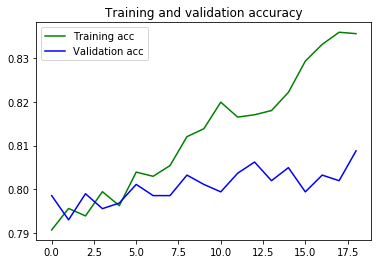

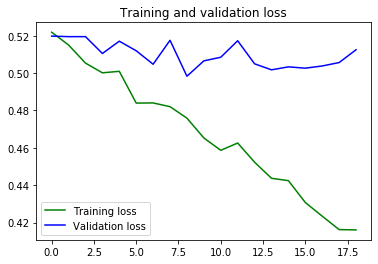

In [0]:
acc = hist_1.history['acc']
val_acc = hist_1.history['val_acc']
loss = hist_1.history['loss']
val_loss = hist_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

A su vez, podemos visualizar nuestros resultados mediante una matriz de confusión. Importemos algunas librerías.

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [0]:
y_pred = lstm_mod1.predict(X_test)  # salida de las probabilidades de cada sentimiento
# Creación de un arrat de numpy vacio que sea igual a la longitud de las observaciones de entrenamiento
y_pred_array = np.zeros(X_test.shape[0])

# Determinación de la clase con mayor probabilidada
for i in range(0, y_pred.shape[0]):
    label_predict = np.argmax(y_pred[i]) # columna de probabilidades máximas
    y_pred_array[i] = label_predict

# Conversión a enteros.
y_pred_array = y_pred_array.astype(int)

In [0]:
# Conversión de y_test a un array 1d de numpy:
y_test_array = np.zeros(X_test.shape[0])

# Determinaciónd e la clase con 1
for i in range(0, y_test.shape[0]):
    label_predict = np.argmax(y_test[i])
    y_test_array[i] = label_predict

y_test_array = y_test_array.astype(int)

In [0]:
class_names = np.array(['Negative', 'Neutral', 'Positive'])

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Atención

Las redes LSTM y GRU resuelven la inestabilidad de gradientes ya que proveen diferentes rutas por las que se puede propagar el gradiente. En cierta forma son una autopista de información. Sin embargo, estas redes todavía tienen un problema de memoria que las arquitecturas LSTM/GRU simplemente alivianan. Este problema se debe a que estamos intentando condensar toda la información de todos los pasos temporales en un sólo vector de estado. Adicionalmente, las redes neuronales no son paralelizables lo que hace que el tiempo de entrenamiento e inferencia sea considerablemente más lento que las redes convolucionales. Este último inconveniente lo resolveremos más adelante mediante las redes Transformer.

Para resolver el problema de la memoria vamos a ver el mecanismo de atención de Bahdanau. Por lo general este mecanismo se aplica para redes neuronales recurrentes encoder/decoder. Sin atención, la arquitectura encoder/decoder tiene la siguiente forma:

<img src="https://miro.medium.com/max/2758/1*TkVKlV-Pk7POJUhlWHRgDA.png"/>

Bajo este mecanismo, no debemos alimentar el decoder únicamente con los estados anteriores sino que se hace una combinación lineal de todos los estados del encoder. Esta combinación lineal se conoce como vector de contexto. Para calcular los coeficientes de la combinación lineal se usa una red neuronal aparte, como se ve en la siguiente figura:

<img src="https://miro.medium.com/max/3276/1*wcxAAgQ0n9gOXLRqhmaLGA.png"/>

El proceso se resume en los siguientes pasos:


1.   Calcular los estados del encoder
2.   Calcular los puntajes de la atención
3.   Hacer un softmax de los puntajes
4.   Calcular el vector de contexto
5.   Concatenar el vector de contexto con el estado del decoder
6.   Alimentar el decoder

La atención de Luong hace este mismo proceso pero con las salidas del decoder

## Ejemplo: Traducción (Many-to-Many)

Cargamos los datos. Son pares de oraciones en inglés/español separados por tabs

In [0]:
 !wget http://www.manythings.org/anki/spa-eng.zip
 !unzip -o spa-eng.zip

--2020-02-14 14:44:45--  http://www.manythings.org/anki/spa-eng.zip
Resolving www.manythings.org (www.manythings.org)... 104.24.108.196, 104.24.109.196, 2606:4700:3033::6818:6dc4, ...
Connecting to www.manythings.org (www.manythings.org)|104.24.108.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4767708 (4.5M) [application/zip]
Saving to: ‘spa-eng.zip.3’

spa-eng.zip.3       100%[===================>]   4.55M  5.17MB/s    in 0.9s    

2020-02-14 14:44:47 (5.17 MB/s) - ‘spa-eng.zip.3’ saved [4767708/4767708]

Archive:  spa-eng.zip
  inflating: _about.txt              
  inflating: spa.txt                 


In [0]:
import re
import numpy as np
import matplotlib.pyplot as plt
def quitarchar(texto):
  abc=' abcdefghijklmnopqrstuvwxyzáéíóúüñ.,!?0123456789'
  texto=re.sub(r"([?.!,¿])", r" \1 ", texto)
  texto=re.sub(r'[" "]+', " ", texto)
  nuevotexto=''
  for x in texto.lower():
    if x in abc: nuevotexto+=x
  nuevotexto = re.sub(r"[^a-zA-Z?.!,¿]+", " ", nuevotexto)
  return nuevotexto.strip()
with open('spa.txt','r',encoding='utf8') as f:
  datos=[(quitarchar(x.split('\t')[0]),quitarchar(x.split('\t')[1])) for x in f.readlines()]
datos[:10]

[('go .', 've .'),
 ('go .', 'vete .'),
 ('go .', 'vaya .'),
 ('go .', 'v yase .'),
 ('hi .', 'hola .'),
 ('run !', 'corre !'),
 ('run !', 'corran !'),
 ('run !', 'corra !'),
 ('run !', 'corred !'),
 ('run .', 'corred .')]

Se cargan los datos en inglés como inputs y en español como outputs

In [0]:
inputs=['<start> '+x[0]+' <end>' for x in datos]
outputs=['<start> '+x[1]+' <end>' for x in datos]
maxin=max([len(x.split(' ')) for x in inputs])
maxout=max([len(x.split(' ')) for x in outputs])
len(inputs),len(outputs),maxin,maxout

(123335, 123335, 53, 62)

In [0]:
inputs[0],outputs[0]

('<start> go . <end>', '<start> ve . <end>')

Se hace una lista de todas las palabras en inglés y en español

In [0]:
wordsin=['-']
wordsout=['-']
for x in inputs:
  for y in x.split(' '):
    if y not in wordsin:wordsin.append(y)
for x in outputs:
  for y in x.split(' '):
    if y not in wordsout:wordsout.append(y)

Hay que calcular la longitud de oraciones más largas y la cantidad de palabras únicas en cada idioma

In [0]:
cantin=len(wordsin)
cantout=len(wordsout)
cantin,cantout

(13472, 23205)

In [0]:
dictin={x:i for i,x in enumerate(wordsin)}
dictout={x:i for i,x in enumerate(wordsout)}

Debemos tokenizar por batches convirtiendo cada caracter a un vector one-hot

In [0]:
def tokenbatch(bsize,shuffle=True):
  while 1:
    indices=np.array(range(len(inputs)))
    if shuffle: np.random.shuffle(indices)
    for i in range(len(inputs)//bsize):
      batchidx=indices[i*bsize:(i+1)*bsize]
      encin=np.zeros([bsize,maxin])
      decin=np.zeros([bsize,maxout])
      decout=np.zeros([bsize,maxout])
      for j in range(bsize):
        for t,letra in enumerate(inputs[batchidx[j]].split(' ')):
          encin[j,t]=dictin[letra]
        for t,letra in enumerate(outputs[batchidx[j]].split(' ')):
          decin[j,t]=dictout[letra]
          if t>0:
            decout[j,t-1]=dictout[letra]
      yield (encin[:,::-1],decin),decout

Tomemos un batch de ejemplo

In [0]:
(encin,decin),decout=next(onehotbatch(2))
encin.shape,decin.shape,decout.shape

((2, 53), (2, 62), (2, 62))

In [0]:
%tensorflow_version 2.x
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,TimeDistributed,Dense,GRU,Concatenate,Attention,Embedding
bsize=32
hsize=256
esize=256

TensorFlow 2.x selected.


Hay que configurar las variables de entrada al modelo

In [0]:
encoder_in = Input(batch_shape=(bsize, maxin))
decoder_in = Input(batch_shape=(bsize, maxout))

Encoder

In [0]:
encoder_embed = Embedding(cantin,esize)
encoder_embeddings = encoder_embed(encoder_in)
encoder_gru = GRU(hsize, return_sequences=True, return_state=True)
encoder_out, encoder_state = encoder_gru(encoder_embeddings)

Decoder

In [0]:
decoder_embed = Embedding(cantout,esize)
decoder_embeddings = decoder_embed(decoder_in)
decoder_gru = GRU(hsize, return_sequences=True, return_state=True)
decoder_out, decoder_state = decoder_gru(decoder_embeddings, initial_state=encoder_state)

Atención

In [0]:
attn_layer = Attention()
attn_out = attn_layer([decoder_out,encoder_out])

Output

In [0]:
decoder_concat_input = Concatenate(axis=-1)([decoder_out, attn_out])
dense = Dense(cantout, activation='softmax')
dense_time = TimeDistributed(dense)
decoder_pred = dense_time(decoder_concat_input)

Entrenamiento

In [0]:
modelo = Model(inputs=[encoder_in, decoder_in], outputs=decoder_pred)
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])
modelo.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(32, 53)]           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(32, 62)]           0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (32, 53, 256)        3448832     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (32, 62, 256)        5940480     input_2[0][0]                    
______________________________________________________________________________________________

In [0]:
modelo.fit(x=tokenbatch(bsize),epochs=1,steps_per_epoch=len(inputs)//bsize)

  ...
    to  
  ['...']
Train for 3854 steps
Epoch 1/5
3854/3854 [==============================] - 639s 166ms/step - loss: 0.5852 - acc: 0.9144
Epoch 2/5
  14/3854 [..............................] - ETA: 10:43 - loss: 0.3502 - acc: 0.9394

KeyboardInterrupt: ignored

## Inferencia

Entradas

In [0]:
bsize = 1
encoder_inf_inputs = Input(batch_shape=(bsize, maxin))
decoder_inf_inputs = Input(batch_shape=(bsize, 1))
encoder_inf_states = Input(batch_shape=(bsize, maxin, hsize))
decoder_init_state = Input(batch_shape=(bsize, hsize))

Encoder

In [0]:
encoder_inf_embeddings = encoder_embed(encoder_inf_inputs)
encoder_inf_out, encoder_inf_state = encoder_gru(encoder_inf_embeddings)
encoder_model = Model(inputs=encoder_inf_inputs, outputs=[encoder_inf_out, encoder_inf_state])

Decoder

In [0]:
decoder_inf_embeddings = decoder_embed(decoder_inf_inputs)
decoder_inf_out, decoder_inf_state = decoder_gru(decoder_inf_embeddings, initial_state=decoder_init_state)
attn_inf_out = attn_layer([decoder_inf_out,encoder_inf_states])
attn_inf_states= attn_layer._calculate_scores(decoder_inf_out,encoder_inf_states)
decoder_inf_concat = Concatenate(axis=-1)([decoder_inf_out, attn_inf_out])
decoder_inf_pred = TimeDistributed(dense)(decoder_inf_concat)
decoder_model = Model(inputs=[encoder_inf_states, decoder_init_state, decoder_inf_inputs],outputs=[decoder_inf_pred, attn_inf_states, decoder_inf_state])

One-hot encoding de la frase a traducir

In [0]:
frase=inputs[1234]
seqin=np.zeros((1,maxin))
for t,word in enumerate(frase.split(' ')):
  seqin[0,t]=dictin[word]
seqin=seqin[:,::-1]
frase,seqin.shape

('<start> i saw that . <end>', (1, 53))

Inicializar la frase traducida

In [0]:
seqout=np.zeros((1,1))
seqout[0,0]=dictout['<start>']

In [0]:
enc_out, enc_ult = encoder_model.predict(seqin)
dec_state = enc_ult
acumatt = []
texto = ''
for i in range(100):
    dec_out, attention, dec_state = decoder_model.predict([enc_out, dec_state, seqout])
    dec_ind = np.argmax(dec_out, axis=-1)[0, 0]
    if dec_ind == dictout['<end>']:
        break
    seqout=np.zeros((1,1))
    seqout[0,0]=dec_ind
    acumatt.append(attention[:,:,::-1])
    texto+=' '
    texto+=wordsout[dec_ind]
texto=texto.strip()
print(texto)

yo vi eso .


## Alineación

La atención además nos provee una herramienta de visualización bastante intuitiva conocida como la alineación. Esta consta en graficar los puntajes de la atención para cada paso del decoder. Esto nos dirá en cada estado del decoder a que paso en el encoder se le prestó más atención.

In [0]:
atencion=np.array(acumatt)
atencion=atencion[:,:,:,:len(frase.split(' '))]
atencion.shape=(-1,len(frase.split(' ')))
atencion.shape

(4, 6)

In [0]:
atencion=np.exp(atencion)/np.sum(np.exp(atencion),axis=-1).reshape(-1,1)

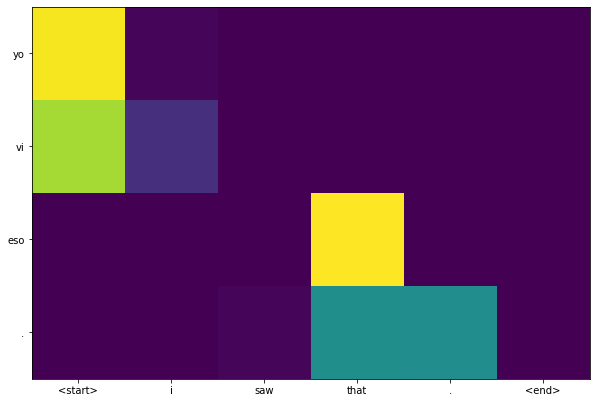

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticks(np.arange(len(frase.split(' '))))
ax.set_yticks(np.arange(len(texto.split(' '))))
ax.set_xticklabels(list(frase.split(' ')))
ax.set_yticklabels(list(texto.split(' ')))
im = ax.imshow(atencion)

## Auto-Atención

Hasta el momento, la atención nos ha permitido calcular la relación entre dos posiciones en dos secuencias diferentes. La auto-atención implica calcular la relación de dos posiciones en la misma secuencia. Para cada entrada se debe calcular un query, un key y un value usando una red densa. Estos son los vectores que se usan para la atención tomando el query como si fuera el estado del decoder, el key se usa para calcular los puntajes y el value para calcular el vector de contexto.

<img src="https://miro.medium.com/max/3156/1*_92bnsMJy8Bl539G4v93yg.gif"/>

# Transformer

La red neuronal transformer se introdujo en el artículo "Attention is all you need" de Google que intenta reemplazar las redes recurrentes con mecanismos de atención unicamente (De ahí sale el nombre). Para lograrlo se usa auto-atención en el encoder y decoder y atención normal entre ellos de la siguiente manera:


1.   Calcular los estados del encoder con auto-atención
2.   Calcular los estados del decoder con auto-atención con una máscara
3.   Calcular las salidas del decoder con atención entre el encoder y el decoder

En el segundo paso se debe usar una máscara ya que en la inferencia no se sabrá cuales son las salidas que siguen. Esto permite paralelizar las operaciones en el encoder y el decoder sin necesidad de la conexión recurrente. 

<img src="https://miro.medium.com/max/1284/1*1BFAQXkNiLySIhB__24EkQ.png"/>

In [0]:
 %tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


# Predicción en series de tiempo (Forecasting)

El problema de la predicción de series de tiempo es algo más complicado que simplemente hacer una regresión, esto ya que se agrega la complejidad de la dependencia de la secuencia (de los valores anteriormente predichos).

Es en estos casos que las redes con memoria son muy útiles.

Haremos a continuación un par de ejemplos de predicción simple, intentaremos predecir el numero de pasajeros que viajarán en avión en aerolineas internacionales, més a mes (en unidades de 1000). Usaremos para ello un dataset que inicia en enero de 1949 y va hasta diciembre de 1960, es decir 144 observaciones. 

Descarguemos los datos y visualicemos.

In [0]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2020-02-15 01:05:05--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv.1’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2020-02-15 01:05:05 (48.7 MB/s) - ‘airline-passengers.csv.1’ saved [2180/2180]



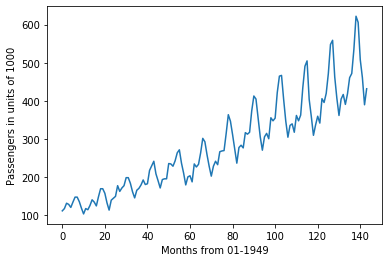

In [0]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('airline-passengers.csv', usecols=[1])
dataset = dataset.astype('float32')
plt.plot(dataset)
plt.ylabel('Passengers in units of 1000')
plt.xlabel('Months from 01-1949')
plt.show()

In [0]:
import numpy
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
# fijemos una semilla para que nuestros resultados sean reproducibles
numpy.random.seed(7)

In [0]:
# usemos scikitlearn para normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

Procederemos a separar nuestros datos en el conjunto de entrenamiento y test, un detalle importante a tener en cuenta en éste tipo de tareas es el ordenamiento temporar.

Si hacemos un particionado de manera típica, los datos serán mezclados de manera aleatoria antes de su partición, esto hará que se pierda el ordenamiento y por tanto que sea imposible capturar las relaciones temporales en los datos.

In [0]:
# split into train and test sets
train_size = int(len(dataset) * 0.65)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

93 51


### Ventanas de tiempo

Con la siguiente función crearemos una matriz cuyas columnas iran generando un delay respecto a la anterior hasta llegar a un desface del tamaño del look back.

Con esto crearemos el conjuto de datos adecuado para ingresar a nuestra red de la forma.

$x(0),...,x(t),x(t+1),...,x(LB)$

In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
# en este caso X=t, Y=t+1 
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX[:10].T)
print(trainY.T[:10])

[[0.01544401 0.02702703 0.05405405 0.04826255 0.03281853 0.05984557
  0.08494207 0.08494207 0.06177607 0.02895753]]
[0.02702703 0.05405405 0.04826255 0.03281853 0.05984557 0.08494207
 0.08494207 0.06177607 0.02895753 0.        ]


In [0]:
# Hagamos un reshape de la forma [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

A esta forma de crear los datos la llamamos ventana, es decir, abrimos una ventana del tamaño del look_back y la red irá viendo los datos poco a poco a medida que la ventana va recorriendo la señal.

Creemos ahora una pequeña red LSTM con 4 celdas y un shape [1, look_back], es decir a la red le entrará un vector del tamaño de la ventana.

In [0]:

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Train on 91 samples
Epoch 1/100
91/91 - 1s - loss: 0.0340
Epoch 2/100
91/91 - 0s - loss: 0.0155
Epoch 3/100
91/91 - 0s - loss: 0.0129
Epoch 4/100
91/91 - 0s - loss: 0.0117
Epoch 5/100
91/91 - 0s - loss: 0.0108
Epoch 6/100
91/91 - 0s - loss: 0.0098
Epoch 7/100
91/91 - 0s - loss: 0.0089
Epoch 8/100
91/91 - 0s - loss: 0.0078
Epoch 9/100
91/91 - 0s - loss: 0.0070
Epoch 10/100
91/91 - 0s - loss: 0.0060
Epoch 11/100
91/91 - 0s - loss: 0.0053
Epoch 12/100
91/91 - 0s - loss: 0.0047
Epoch 13/100
91/91 - 0s - loss: 0.0041
Epoch 14/100
91/91 - 0s - loss: 0.0035
Epoch 15/100
91/91 - 0s - loss: 0.0031
Epoch 16/100
91/91 - 0s - loss: 0.0028
Epoch 17/100
91/91 - 0s - loss: 0.0025
Epoch 18/100
91/91 - 0s - loss: 0.0023
Epoch 19/100
91/91 - 0s - loss: 0.0021
Epoch 20/100
91/91 - 0s - loss: 0.0021
Epoch 21/100
91/91 - 0s - loss: 0.0020
Epoch 22/100
91/91 - 0s - loss: 0.0019
Epoch 23/100
91/91 - 0s - loss: 0.0019
Epoch 24/100
91/91 - 0s - loss: 0.0019
Epoch 25/100
91/91 - 0s - loss: 0.0018
Epoch 26/100
9

Con nuestro modelo a mano hagamos una predicción, note que la predicción se hace sobre el conjunto de test (testX) completo, no uno a uno.
Además recuerde invertir el escalamiento de los datos, si no los resultados que optenga no concordarán con los deseados. 

In [0]:
#Predicción
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# desescalemos la predicción
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculemos nuestro error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 21.98 RMSE
Test Score: 46.37 RMSE


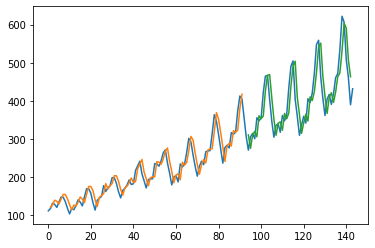

In [0]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
#se hace un corrimiento de los datos predichos para poder visualizarlos
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Recuerde, cuando hablamos de la ventana es el look_back el que la define, por ejemplo podemos usar un tamaño mayo a 1, veamos.


Train on 89 samples
Epoch 1/100
89/89 - 1s - loss: 0.0299
Epoch 2/100
89/89 - 0s - loss: 0.0134
Epoch 3/100
89/89 - 0s - loss: 0.0102
Epoch 4/100
89/89 - 0s - loss: 0.0090
Epoch 5/100
89/89 - 0s - loss: 0.0082
Epoch 6/100
89/89 - 0s - loss: 0.0073
Epoch 7/100
89/89 - 0s - loss: 0.0066
Epoch 8/100
89/89 - 0s - loss: 0.0058
Epoch 9/100
89/89 - 0s - loss: 0.0053
Epoch 10/100
89/89 - 0s - loss: 0.0047
Epoch 11/100
89/89 - 0s - loss: 0.0044
Epoch 12/100
89/89 - 0s - loss: 0.0041
Epoch 13/100
89/89 - 0s - loss: 0.0039
Epoch 14/100
89/89 - 0s - loss: 0.0037
Epoch 15/100
89/89 - 0s - loss: 0.0037
Epoch 16/100
89/89 - 0s - loss: 0.0035
Epoch 17/100
89/89 - 0s - loss: 0.0034
Epoch 18/100
89/89 - 0s - loss: 0.0034
Epoch 19/100
89/89 - 0s - loss: 0.0033
Epoch 20/100
89/89 - 0s - loss: 0.0033
Epoch 21/100
89/89 - 0s - loss: 0.0033
Epoch 22/100
89/89 - 0s - loss: 0.0032
Epoch 23/100
89/89 - 0s - loss: 0.0032
Epoch 24/100
89/89 - 0s - loss: 0.0033
Epoch 25/100
89/89 - 0s - loss: 0.0031
Epoch 26/100
8

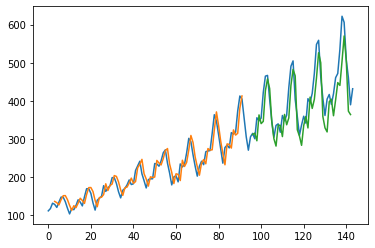

In [0]:
look_back = 3 #ventana de 3 pasos de tiempo
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# Creamos y entrenemos el modelo
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# Predicción
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# desescalado
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculo del error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# graficado
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Tenga cuidado, en este ejemplo la diferencia en los errores no es un indicador real de lo bueno o lo malo que sea el modelo, esto ya que el tamaño de la ventana solo está siendo puesta para ilustrar el concepto, realmente deberíamos hacer una busqueda adecuada de los hiperparámetros.

### Pasos de tiempo (Time steps).

También es posible generar los datos como pasos de tiempo y no como ventanas, esta forma de entregar los datos a la red es más cercana al problema que estamos tratando de series de tiempo.

Podemos conseguir esto usando la misma representación de los datos que tenemos para las ventanas, pero en ahora el reshape se hará diferente


In [0]:

# el reshape ahora será [samples, time steps, features]
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [0]:
print(trainX[:10])

[[[0.01544401]
  [0.02702703]
  [0.05405405]]

 [[0.02702703]
  [0.05405405]
  [0.04826255]]

 [[0.05405405]
  [0.04826255]
  [0.03281853]]

 [[0.04826255]
  [0.03281853]
  [0.05984557]]

 [[0.03281853]
  [0.05984557]
  [0.08494207]]

 [[0.05984557]
  [0.08494207]
  [0.08494207]]

 [[0.08494207]
  [0.08494207]
  [0.06177607]]

 [[0.08494207]
  [0.06177607]
  [0.02895753]]

 [[0.06177607]
  [0.02895753]
  [0.        ]]

 [[0.02895753]
  [0.        ]
  [0.02702703]]]


Crearemos un modelo igual al usado anteriormente, con la diferencia que el shape de la entrada ahora será un vector columna de la forma [look_back, 1] (para las ventanas recuerde que es [1,look_back])

In [0]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Train on 89 samples
Epoch 1/100
89/89 - 2s - loss: 0.0172
Epoch 2/100
89/89 - 0s - loss: 0.0083
Epoch 3/100
89/89 - 0s - loss: 0.0075
Epoch 4/100
89/89 - 0s - loss: 0.0064
Epoch 5/100
89/89 - 0s - loss: 0.0058
Epoch 6/100
89/89 - 0s - loss: 0.0050
Epoch 7/100
89/89 - 0s - loss: 0.0045
Epoch 8/100
89/89 - 0s - loss: 0.0040
Epoch 9/100
89/89 - 0s - loss: 0.0038
Epoch 10/100
89/89 - 0s - loss: 0.0038
Epoch 11/100
89/89 - 0s - loss: 0.0035
Epoch 12/100
89/89 - 0s - loss: 0.0033
Epoch 13/100
89/89 - 0s - loss: 0.0034
Epoch 14/100
89/89 - 0s - loss: 0.0034
Epoch 15/100
89/89 - 0s - loss: 0.0032
Epoch 16/100
89/89 - 0s - loss: 0.0034
Epoch 17/100
89/89 - 0s - loss: 0.0032
Epoch 18/100
89/89 - 0s - loss: 0.0032
Epoch 19/100
89/89 - 0s - loss: 0.0032
Epoch 20/100
89/89 - 0s - loss: 0.0032
Epoch 21/100
89/89 - 0s - loss: 0.0032
Epoch 22/100
89/89 - 0s - loss: 0.0032
Epoch 23/100
89/89 - 0s - loss: 0.0032
Epoch 24/100
89/89 - 0s - loss: 0.0031
Epoch 25/100
89/89 - 0s - loss: 0.0032
Epoch 26/100
8

Train Score: 25.42 RMSE
Test Score: 55.86 RMSE


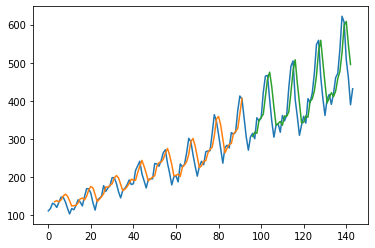

In [0]:
#hacemos una predicción
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Reescalemos
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculamos el error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# Graficamos
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Esta última forma de entregar los datos suele tener un mejor performance en general, ya que tiene más sentido para el problema y para el diseño de la red que las ventanas.

Existen además de las ventanas y los pasos de tiempo otro par de técnicas más avanzadas en el tratamiento de estos problemas como la memoria entre batches o la memoria entre batches apiladas [Un ejemplo de estas](https://machinelearningmastery.com/stacked-long-short-term-memory-networks/). 

#Ejercicio 1

Usando lo aprendido sobre embedding y arquitecturas many-to-one realizar una analisis de sentimientos con el sigueinte dataset https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Tenga encuenta que tendra qeu aplicar lo aprendido hasta ahora sobre preprocesamiento de texto

## Solucion

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importemos algunas de las librerias que nececitaremos 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import seaborn as sns

In [0]:
path = '/content/drive/My Drive/DataSets/IMBD /IMDB Dataset.csv'

Importemos el dataset usando pandas

In [0]:
data_set = pd.read_csv(path)

In [0]:
data_set.shape

(50000, 2)

In [0]:
data_set.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [0]:
len(data_set['review'][0])

1761

In [0]:
len(data_set['review'][1])

998

In [0]:
data_train = data_set.iloc[0:25000,:]
data_test = data_set.iloc[25000:,:]

In [0]:
data_train.shape

(25000, 2)

In [0]:
data_test.shape

(25000, 2)

In [0]:
data_train.groupby('sentiment').count()/25000

review
sentiment         
negative   0.50104
positive   0.49896

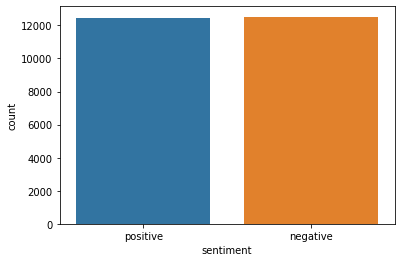

In [0]:
sns.countplot(data_train['sentiment'])

Ahora con lo aprendido anteriormente , relicemos una limpieza de los datos

In [0]:
tokenizer = Tokenizer(num_words=10000)

In [0]:
tokenizer.fit_on_texts(data_train['review'])

In [0]:
#sequences = tokenizer.texts_to_sequences(data_set['review'])

In [0]:
X_train = tokenizer.texts_to_sequences(data_train['review'])
X_test = tokenizer.texts_to_sequences(data_test['review'])

In [0]:
X_train

[[27,
  4,
  1,
  77,
  2019,
  45,
  1006,
  12,
  100,
  147,
  39,
  318,
  3335,
  425,
  450,
  26,
  3076,
  33,
  23,
  197,
  14,
  11,
  6,
  602,
  48,
  596,
  15,
  69,
  7,
  7,
  1,
  87,
  148,
  12,
  3387,
  69,
  41,
  3335,
  13,
  92,
  5350,
  2,
  133,
  4,
  543,
  60,
  271,
  8,
  197,
  36,
  1,
  649,
  139,
  1686,
  69,
  11,
  6,
  21,
  3,
  118,
  16,
  1,
  8001,
  2225,
  38,
  11,
  118,
  2518,
  54,
  5451,
  15,
  5151,
  5,
  1345,
  383,
  38,
  543,
  92,
  6,
  3879,
  8,
  1,
  354,
  346,
  4,
  1,
  649,
  7,
  7,
  9,
  6,
  432,
  3335,
  14,
  12,
  6,
  1,
  356,
  5,
  1,
  5769,
  2713,
  1178,
  9,
  2754,
  1405,
  20,
  525,
  32,
  4755,
  2678,
  4,
  1,
  1236,
  119,
  29,
  1,
  6968,
  25,
  3090,
  2,
  385,
  34,
  6,
  21,
  316,
  20,
  1,
  4476,
  7279,
  525,
  6,
  350,
  5,
  105,
  7179,
  4438,
  8002,
  2289,
  2,
  50,
  34,
  326,
  8151,
  6618,
  2,
  9654,
  23,
  110,
  236,
  241,
  7,
  7,
  10,
  58,
  132

In [0]:
X_train = pad_sequences(X_train, maxlen=500)
X_test = pad_sequences(X_test, maxlen=500)

In [0]:
len(np.unique(X_train))

10000

In [0]:
y_train = data_train['sentiment'].map({'positive':1, 'negative':0 })
y_test = data_test['sentiment'].map({'positive':1, 'negative':0 })

Ahora procedamos a crear el modelo

In [0]:
model = keras.models.Sequential([
                                 keras.layers.Embedding(input_dim=10000 , output_dim=32, input_length=500),
                                 keras.layers.LSTM(20),
                                 keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                4240      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 324,261
Trainable params: 324,261
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
model.fit(X_train,y_train, epochs=5, batch_size=512, validation_data=(X_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 60s 2ms/sample - loss: 0.6739 - acc: 0.6460 - val_loss: 0.5660 - val_acc: 0.7724
Epoch 2/5
25000/25000 [==============================] - 58s 2ms/sample - loss: 0.4543 - acc: 0.8056 - val_loss: 0.3785 - val_acc: 0.8486
Epoch 3/5
25000/25000 [==============================] - 58s 2ms/sample - loss: 0.2959 - acc: 0.8862 - val_loss: 0.3048 - val_acc: 0.8770
Epoch 4/5
25000/25000 [==============================] - 58s 2ms/sample - loss: 0.2165 - acc: 0.9230 - val_loss: 0.2987 - val_acc: 0.8845
Epoch 5/5
25000/25000 [==============================] - 59s 2ms/sample - loss: 0.1730 - acc: 0.9443 - val_loss: 0.2938 - val_acc: 0.8857


Ahora hagamos una prueba en una comentario

In [0]:
comentario_1 = ["I've never seen anything so bad in this world"]
comentario_2 = ["The moveio was not good"]

In [0]:
comentario = tokenizer.texts_to_sequences(comentario_2)

In [0]:
comentario = pad_sequences(comentario, maxlen=500)

In [0]:
model.predict(comentario)

array([[0.55814886]], dtype=float32)

In [0]:
model.predict_classes(comentario)

array([[1]], dtype=int32)

# Ejercicio 2 

Basado en el ejemplo de forecasting, prediga el precio de stock ( de apertura) para el sigueinte dataset 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'. Primero implmente una arquitectura many-to-one, para predecir el valores de stock un tiempo adelante, lego convierta el problema en un many-to-many para predecir el valor de stock 10 pasos temporales adelante

## solucion

In [0]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

carguemos los datos usando pandas

In [0]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data_set = pd.read_csv(url)

In [0]:
data_set.head(2)

Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
0  2018-09-28  234.05  235.95  ...  233.75               3069914          7162.35
1  2018-09-27  234.55  236.80  ...  233.25               5082859         11859.95

[2 rows x 8 columns]

In [0]:
data_set.tail(2)

Date   Open   High  ...   Close  Total Trade Quantity  Turnover (Lacs)
2033  2010-07-22  120.3  122.0  ...  120.90                293312           355.17
2034  2010-07-21  122.1  123.0  ...  121.55                658666           803.56

[2 rows x 8 columns]

In [0]:
data_set.shape

(2035, 8)

coloquemos el dataset en orden ascendente 

In [0]:
data_set = data_set.reindex(index= data_set.index[::-1])

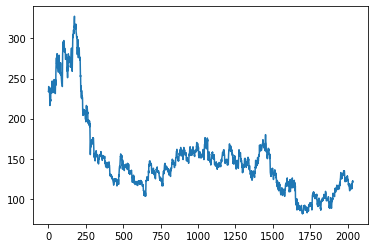

In [0]:
plt.plot(data_set['Open'])

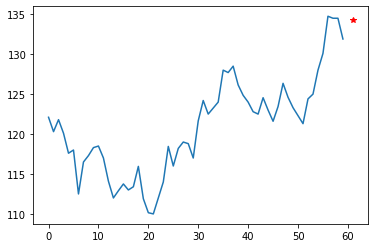

In [0]:
plt.plot(np.arange(0,60),data_set.iloc[:60,1])
plt.plot(61,data_set.iloc[60,1],'r*')

normalicemos los datos

In [0]:
data_set = data_set[['Open']]
scale = StandardScaler()
data_set = scale.fit_transform(data_set)

ahora prosedamos a contruir el dataset con el cual vamos a entrenar , este debe tener las dimensiones [sample, timestep, features]

In [0]:
X = []
y = []
for i in np.arange(60,2035):
  X.append(data_set[i-60:i,0])
  y.append(data_set[i,0])

X = np.array(X)
y = np.array(y)

In [0]:
X = X.reshape((-1,60,1))

In [0]:
y = y.reshape((-1,1))

In [0]:
print(X.shape, y.shape)

(1975, 60, 1) (1975, 1)


In [0]:
X_train, X_test , y_train,y_test = train_test_split(X,y)

Ahora procedamos a contruir el modelo many-to-one

In [0]:
X_train.shape

(1481, 60, 1)

In [0]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True , input_shape=[None,1]),
    keras.layers.LSTM(20),
    keras.layers.Dense(1)
])

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, None, 20)          1760      
_________________________________________________________________
lstm_6 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 5,061
Trainable params: 5,061
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse', optimizer='nadam')

In [0]:
model.fit(X_train,y_train, epochs=10, validation_split=0.2, validation_data=(X_test,y_test))

Train on 1481 samples, validate on 494 samples
Epoch 1/10
1481/1481 [==============================] - 7s 5ms/sample - loss: 0.2569 - val_loss: 0.0553
Epoch 2/10
1481/1481 [==============================] - 4s 3ms/sample - loss: 0.0408 - val_loss: 0.0402
Epoch 3/10
1481/1481 [==============================] - 4s 3ms/sample - loss: 0.0306 - val_loss: 0.0294
Epoch 4/10
1481/1481 [==============================] - 4s 3ms/sample - loss: 0.0271 - val_loss: 0.0261
Epoch 5/10
1481/1481 [==============================] - 4s 3ms/sample - loss: 0.0246 - val_loss: 0.0244
Epoch 6/10
1481/1481 [==============================] - 4s 3ms/sample - loss: 0.0225 - val_loss: 0.0224
Epoch 7/10
1481/1481 [==============================] - 4s 3ms/sample - loss: 0.0201 - val_loss: 0.0215
Epoch 8/10
1481/1481 [==============================] - 4s 3ms/sample - loss: 0.0188 - val_loss: 0.0235
Epoch 9/10
1481/1481 [==============================] - 4s 3ms/sample - loss: 0.0183 - val_loss: 0.0202
Epoch 10/10
1481/

Ahora evaluemos los resultados

In [0]:
y_predict = model.predict(X_test)

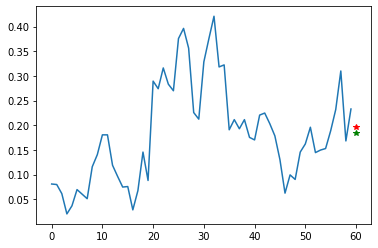

In [0]:
plt.plot(X_test[0,:,0])
plt.plot(60, y_predict[0], 'r*')
plt.plot(60,y_test[0], 'g*')

In [0]:
prediction = model.predict(data_set.reshape((1,-1,1)))

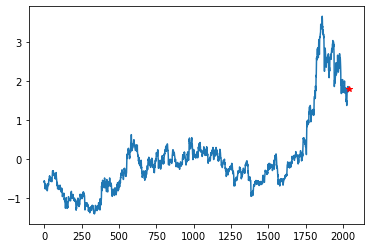

In [0]:
plt.plot(data_set)
plt.plot(2036,prediction, 'r*')